<a href="https://colab.research.google.com/github/b62mp1/ExistingResults/blob/main/Arima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
keras = tf.keras

## Data Extraction

In [6]:
#pip install yfinance

In [13]:
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

today=dt.date.today()
startDate=today-dt.timedelta(days=10*365)
stock_name = "GOOG"
df=pdr.get_data_yahoo(stock_name, start=(startDate), end=today).reset_index()
print("Number of rows and columns:", df.shape)
df.head(5)

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (2513, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-12-19,312.832428,313.076508,308.842377,309.753967,309.753967,4303069
1,2011-12-20,312.827454,314.740265,312.822479,314.008026,314.008026,4794303
2,2011-12-21,313.828705,314.730316,308.324310,311.741516,311.741516,5014525
3,2011-12-22,312.802551,314.685486,312.334290,313.674286,313.674286,3658261
4,2011-12-23,314.819977,316.154968,314.102661,315.387848,315.387848,2918298


In [14]:
df.dropna(inplace=True)

### df Train Test Split

Here we can see our complete plot in terms of time steps. Our entire data set is just shy of 7000 time steps. We know that our data is in days, so our data is just shy of 7000 daily observations. We need to separate out a training and validation set to see how our model holds up.

I will be choosing an arbitrary date to separate the training, validation, and test data.

In [129]:
series = df['Close']

# Create train data set
train_split_date = '2015-12-31'
train_split_index = np.where(df.Date == train_split_date)[0][0]
x_train = df.loc[df['Date'] <= train_split_date]['Close']

# Create test data set
test_split_date = '2018-01-02'
test_split_index = np.where(df.Date == test_split_date)[0][0]
x_test = df.loc[df['Date'] >= test_split_date]['Close']
dates = df.loc[df['Date'] >= test_split_date]['Date']
# Create valid data set
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = df.loc[(df['Date'] < test_split_date) & (df['Date'] > train_split_date)]['Close']

# ARIMA

### Step 4: Building the Arima Model and Forecasting
Now that we have experimented and found our prefered model order of (4,2,0) lets build the model and get some forecasts.

This cell takes a while to run. Be careful. We have stored the model predictions using a magic method so we do not have to re-run this time consuming cell everytime.

In [147]:
from statsmodels.tsa.arima_model import ARIMA

# Create list of x train valuess
history = [x for x in x_train]

# establish list for predictions
model_predictions = []

# Count number of test data points
N_test_observations = len(x_test)

# loop through every data point
for time_point in list(x_test.index[-50:]):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = x_test[time_point]
    history.append(true_test_value)
        

In [145]:
#model_predictions = np.array(model_predictions).flatten()
#model_predictions

In [140]:
from datetime import datetime
date = [str(d)[:10] for d in dates[-50:]]
#date

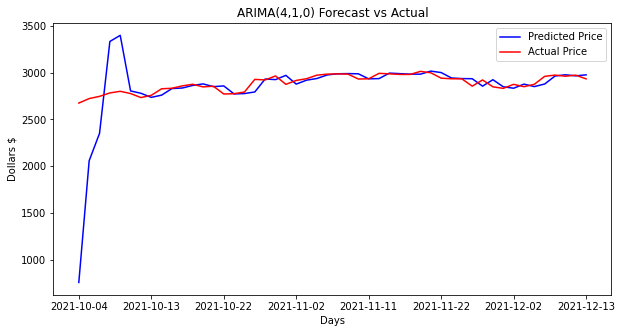

In [148]:
# Plot our predictions against the actual values for a visual comparison.
plt.figure(figsize=(10,5))

plt.plot(x_test.index[-50:], model_predictions[-50:], color='blue',label='Predicted Price')
plt.plot(x_test.index[-50:], x_test[-50:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Days')
plt.title('ARIMA(4,1,0) Forecast vs Actual')
#plt.xticks(x_test.index[-50:], date)
plt.xticks( x_test.index[-50::7], date[-50::7])
plt.legend()
plt.show()